In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

phenotype_data = pd.read_csv('../data/TCGA-BRCA.clinical.tsv', sep='\t')
gene_counts_data = pd.read_csv('../data/TCGA-BRCA.star_counts.tsv', sep='\t')

# Print the first few rows of the data
#print(data.head())
#print(phenotype_data.columns)
#print(gene_counts_data.columns)
#print(gene_counts_data.head())
#print(phenotype_data['sample'].sort_values())
#print(gene_counts_data.columns.sort_values())








In [81]:
#print(phenotype_data.head)
print(phenotype_data['sample_type.samples'].value_counts())


#seperate the data into tumor, normal, and metastatic
tumor_ids = phenotype_data[phenotype_data['sample_type.samples'] == 'Primary Tumor']['sample']
normal_ids = phenotype_data[phenotype_data['sample_type.samples'] == 'Solid Tissue Normal']['sample']
metastatic_ids = phenotype_data[phenotype_data['sample_type.samples'] == 'Metastatic']['sample']

#print(tumor_ids)
#print(normal_ids)
#print(metastatic_ids)   

#get the gene data for the tumor, normal, and metastatic samples
tumor_ids_existing = [col for col in tumor_ids if col in gene_counts_data.columns]
normal_ids_existing = [col for col in normal_ids if col in gene_counts_data.columns]
metastatic_ids_existing = [col for col in metastatic_ids if col in gene_counts_data.columns]

tumor_gene_seq = gene_counts_data[tumor_ids_existing].T
normal_gene_seq = gene_counts_data[normal_ids_existing].T
metastatic_gene_seq = gene_counts_data[metastatic_ids_existing]

#concat but add identifiers
tumor_gene_seq['tumor'] = 1
normal_gene_seq['tumor'] = 0

#full_data
full_data = pd.concat([tumor_gene_seq, normal_gene_seq], axis=0)

#print(tumor_gene_seq)
#print(normal_gene_seq)
#print(metastatic_gene_seq)

print(full_data)




sample_type.samples
Primary Tumor          1111
Solid Tissue Normal     137
Metastatic                7
Name: count, dtype: int64
                          0          1          2          3          4  \
TCGA-BH-A0W3-01A   9.691744   3.169925  10.535275  10.639341   9.335390   
TCGA-AR-A24V-01A  11.168672   1.000000  11.681678  10.784635   9.719389   
TCGA-E9-A1NE-01A  10.613789   6.209453  12.121857  11.113742  10.070121   
TCGA-AC-A8OQ-01A   9.432542   5.807355  11.262682   9.337622   9.579316   
TCGA-AC-A23C-01A   9.515700   6.832890  12.538189  11.606868  10.055282   
...                     ...        ...        ...        ...        ...   
TCGA-BH-A18U-11A  11.671099   8.651052  10.556506  10.036174   8.044394   
TCGA-BH-A0DV-11A  12.738092   7.584963  11.337064  10.980854   8.912889   
TCGA-E9-A1RD-11A  12.394999  10.874981  10.957828  10.328675   8.335390   
TCGA-BH-A1FH-11B  11.561288   8.426265  10.820179   9.276124   7.599913   
TCGA-A7-A0D9-11A  11.816984  11.818982  10.28

In [83]:
#filter low expression genes (10+ counts in 10 samples)
#print(full_data.head())
keep_genes = (full_data > 10).sum(axis=1) >=1000
filtered_data = full_data.loc[keep_genes]
#print(filtered_data)
filtered_data.shape


(1219, 60661)

In [84]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
#do a PCA on the log data to visualize any seperation
log_counts = np.log2(filtered_data + 1)
transp = log_counts
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(transp.drop(columns=['tumor']))

#print(log_counts.shape)
#thresh = log_counts.shape[0]/2
#count = 0

print(log_counts.head)
sample_labels = log_counts['tumor']


#for column in log_counts.columns:
#    #print(log_counts[column])
#    total = log_counts[column].isna().sum()
##    if total!=0:
 #       print(total)
 #       count+=1
 #       if log_counts[column]['tumor'] == 1:
 #           print('yes')
#print(count)



<bound method NDFrame.head of                          0         1         2         3         4         5  \
TCGA-BH-A0W3-01A  3.418425  2.060021  3.527981  3.540937  3.369521  3.166278   
TCGA-AR-A24V-01A  3.605100  1.000000  3.664674  3.558835  3.422151  3.306673   
TCGA-E9-A1NE-01A  3.537767  2.849890  3.713900  3.598573  3.468599  3.462181   
TCGA-AC-A8OQ-01A  3.383019  2.767094  3.616203  3.369832  3.403174  3.341558   
TCGA-AC-A23C-01A  3.394473  2.969545  3.758963  3.656138  3.466664  3.299922   
...                    ...       ...       ...       ...       ...       ...   
TCGA-BH-A18U-11A  3.663470  3.270686  3.530633  3.464168  3.177024  3.307994   
TCGA-BH-A0DV-11A  3.780110  3.101812  3.624927  3.582659  3.309306  3.329492   
TCGA-E9-A1RD-11A  3.743623  3.569853  3.579883  3.501907  3.222710  3.528102   
TCGA-BH-A1FH-11B  3.650912  3.236686  3.563180  3.361224  3.104322  3.447367   
TCGA-A7-A0D9-11A  3.679985  3.680210  3.496238  3.377147  3.115256  3.449144   

         

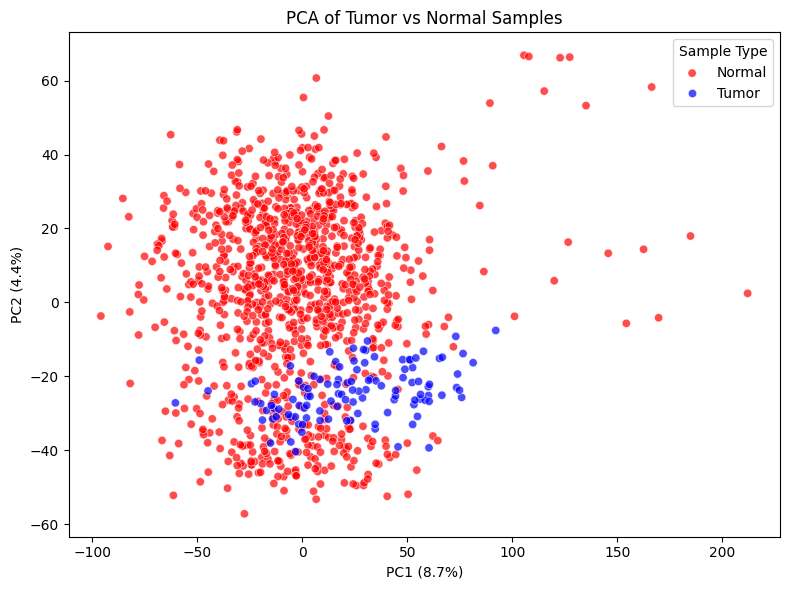

In [105]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=pca_result[:, 0],
    y=pca_result[:, 1],
    hue=sample_labels,
    palette={0: "blue", 1: "red"},
    alpha=0.7
)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("PCA of Tumor vs Normal Samples")
plt.legend(title="Sample Type", labels=["Normal", "Tumor"])
plt.tight_layout()
plt.savefig("../figures/pca_tumor_vs_normal.png", dpi=300)

plt.show()


In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression()
scores = cross_val_score(clf, pca_result[:, :2], transp['tumor'], cv=5)
print(f"Classification accuracy from PCA: {scores.mean():.2f}")

loadings = pca.components_[0]  # PC1
top_gene_indices = np.argsort(np.abs(loadings))[-10:]
top_genes = transp.columns[top_gene_indices]
print("Top contributing genes to PC1:", top_genes.tolist())

Classification accuracy from PCA: 0.89
Top contributing genes to PC1: [48060, 49146, 29897, 53118, 5908, 50975, 37035, 15873, 15102, 49276]


In [ ]:
#ok now for the BetterISUmap implementation that we devised!
